# Random Forest Classifier

In [1]:
import pandas as pd
import numpy as np

import functions_classifier as func

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "../data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,2,73,1,8,0,0
1,1,1,0,38.0,1,0,596,71.28,0,3,136,1,2,0,0
2,1,3,0,26.0,0,0,669,7.92,2,1,251,0,8,1,0
3,1,1,0,35.0,1,0,49,26.55,2,3,198,1,2,0,0
4,0,3,1,35.0,0,0,472,8.05,2,2,11,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,4,406,0,8,1,0
887,1,1,0,19.0,0,0,14,30.00,2,1,221,0,1,1,0
888,0,3,0,29.0,1,2,675,11.72,2,1,293,3,8,0,0
889,1,1,1,26.0,0,0,8,30.00,0,2,52,0,2,1,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]

X = scale(X)

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [6]:
X_train.shape, y_train.shape

((623, 14), (623,))

In [7]:
X_test.shape, y_test.shape

((268, 14), (268,))

## Modeling

#### Building, train and predict model

In [26]:
params =  {
    "criterion": "entropy", 
    "max_depth": 9, 
    "n_estimators": 50
}

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

**Getting Best Hyperparameter Optimization**

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [21]:
# from sklearn.model_selection import (GridSearchCV)

# import warnings
# warnings.filterwarnings("ignore")

# parameters = {
#     "n_estimators":[50, 100, 200., 300, 400, 500, 600],
#     "criterion": ("gini", "entropy", "log_loss"),
#     "max_depth": [None, 3, 5, 7, 9],
#     "min_samples_split": [2, 6, 10, 14],
#     "min_samples_leaf": [1, 2, 3, 4],
    
# }

# gridsearch = GridSearchCV(RandomForestClassifier(), parameters)
# gridsearch.fit(X_train, y_train)

# print("Tuned Hyperparameters :", gridsearch.best_params_)
# print("Best Score:",gridsearch.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 50}  
Best Score: 0.8394967741935485

#### Predict and show model result

In [23]:
func.show_model_result(classifier, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.82681564 0.79775281 0.82022472 0.81460674 0.84831461]
Mean = 0.82 / Standard Deviation = 0.02

Confunsion Matrix
----------------------------------------------------------------------
[[140  17]
 [ 32  79]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268

----------------------------------------------------------------------
Accuracy: 0.82
Precicion: 0.82
Sensitivity aka Recall: 0.82
F1-Score: 0.81


#### Show Curve ROC and Area Under the ROC

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.81
----------------------------------------------------------------------


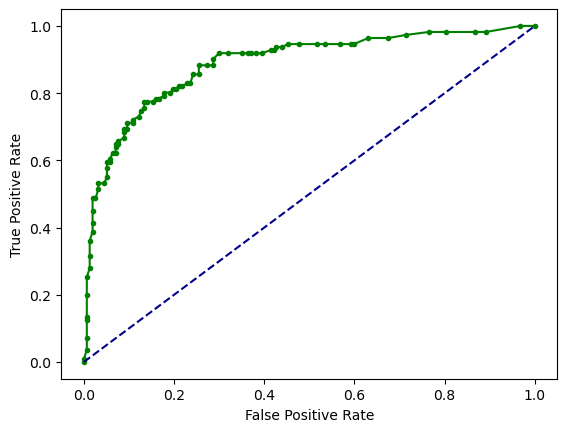

In [12]:
func.show_curve_roc(classifier, X_test, y_test, y_predict)

### Predict Test Dataset

In [ ]:
# XX = test_df.drop(["PassengerId"], axis=1)
# passenger_ids = test_df["PassengerId"]

In [ ]:
yy_predict = pipeline.predict(XX)

__Creates dataset prediction__

In [ ]:
# prediction_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": yy_predict})

In [ ]:
# prediction_df.head()

__Save Dataframe with promising transformations__

In [ ]:
# prediction_df.to_csv(PATH_MY_PREDICTION_CSV, index=False)